In [1]:
#####Capstone RMBS model Spring 2021 for Springboard Data Science Track #####

In [2]:
###Load required pacakages

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import datetime
import warnings
import seaborn as sns

import scipy.stats as stats
import sklearn

warnings.filterwarnings('ignore')
plt.style.use('seaborn')

# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")

import pandas_profiling
from pandas_profiling.utils.cache import cache_file

In [4]:
###Load EDA file

In [5]:
#EDA data filepath downloaded and stored here
filename = 'C:/Users/Jonathan/Desktop/Springboard_Course/Save to folder/data_frame_for_EDA.csv'

In [6]:
df=pd.read_csv(filename, header =0, index_col=['Loan_Sequence_Number','Monthly_Reporting_Period'])

In [7]:
df = pd.DataFrame(df.groupby('Loan_Sequence_Number').first())

In [8]:
df.head()

,Current_Actual_UPB,Current_Loan_Delinquency_Status,Loan_Age,Remaining_Months_to_Legal_Maturity,Modification_Flag,Zero_Balance_Code,Current_Interest_Rate,Current_Deferred_UPB,Actual_Loss_Calculation,Zero_Balance_Removal_UPB,...,Seller_Name,Servicer_Name,Super_Conforming_Flag,Orig_Year,numeric_Loan_Delinquency_Status,consol_Loan_Delinquency_Status,Target_Performance_Variable,Ever_Default,prin_repay_pct,HPA_adjusted_LTV
Loan_Sequence_Number,,,,,,,,,,,,,,,,,,,,,
F100Q1000016,156088.87,0,30.0,330.0,NaN,Non-Default,6.125,0.0,NaN,139465.80,...,Other sellers,Other servicers,N,2002,0,Current,Current,Non-Default,0.0,88.050132
F100Q1000245,100000.00,0,0.0,360.0,NaN,Non-Default,8.375,0.0,NaN,97882.98,...,Other sellers,Other servicers,N,2000,0,Current,Current,Non-Default,0.0,59.000000
F100Q1000257,80000.00,0,0.0,360.0,NaN,Non-Default,8.375,0.0,NaN,78993.42,...,FIFTH THIRD BANK,FIFTH THIRD BANK,N,2000,0,Current,Current,Non-Default,0.0,65.000000
F100Q1000440,167881.43,0,9.0,360.0,NaN,Non-Default,7.750,0.0,NaN,165342.45,...,BRANCH BANKING & TRUST COMPANY,BRANCH BANKING & TRUST COMPANY,N,2001,0,Current,Current,Non-Default,0.0,89.936480
F100Q1000517,121567.88,0,15.0,345.0,NaN,Non-Default,8.375,0.0,NaN,120533.14,...,Other sellers,Other servicers,N,2000,0,Current,Current,Non-Default,0.0,93.136682


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103590 entries, F100Q1000016 to F199Q4169405
Data columns (total 46 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Current_Actual_UPB                  103590 non-null  float64
 1   Current_Loan_Delinquency_Status     103590 non-null  object 
 2   Loan_Age                            103590 non-null  float64
 3   Remaining_Months_to_Legal_Maturity  103590 non-null  float64
 4   Modification_Flag                   1384 non-null    object 
 5   Zero_Balance_Code                   77350 non-null   object 
 6   Current_Interest_Rate               103590 non-null  float64
 7   Current_Deferred_UPB                103590 non-null  float64
 8   Actual_Loss_Calculation             2253 non-null    float64
 9   Zero_Balance_Removal_UPB            77350 non-null   float64
 10  CS_HPA_20_cities                    103527 non-null  float64
 11  CS_HP         

In [10]:
def get_sub_plot(width = 8, height = 5, label_font_size = 14, tick_font_size = 13):
    fig, ax = plt.subplots()
    fig.set_size_inches(width, height)
    ax.tick_params(labelsize = tick_font_size)
    ax.set_xlabel(ax.get_xlabel(), fontsize = label_font_size)
    ax.set_ylabel(ax.get_ylabel(), fontsize = label_font_size)
    return ax

In [11]:
# notes
# histograms, grouping by year
# annual breakdown of target variable
# testing of defaulted versus non-defaulted (or prepay, etc.) loan sequence number
# how to test 
# other

In [12]:
#x1 = (origination_data_combined['Orig_Year'].unique())
#y1 = (origination_data_combined.groupby('Orig_Year').Credit_Score.mean())

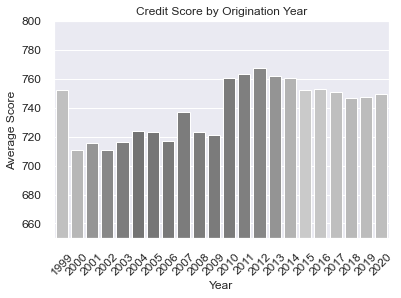

In [13]:
sns.set(style="darkgrid")
g=sns.barplot(x = df['Orig_Year'].unique(), y = df.groupby('Orig_Year').Credit_Score.mean(), data=df, palette=None, saturation=0)
plt.title('Credit Score by Origination Year')
plt.xlabel('Year')
plt.ylabel('Average Score')
g.set_ylim(650, 800)
plt.rcParams["axes.labelsize"] = 8
plt.xticks(rotation=45,size=12)
plt.yticks(size=12)
plt.show()

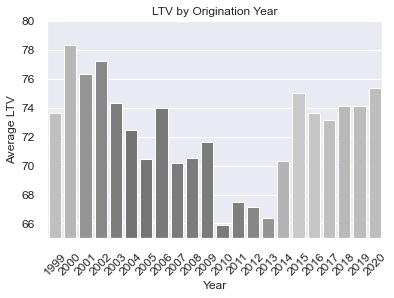

In [14]:
sns.set(style="darkgrid")
g=sns.barplot(x = df['Orig_Year'].unique(), y = df.groupby('Orig_Year').Original_LTV.mean(), data=df, palette=None, saturation=0)
plt.title('LTV by Origination Year')
plt.xlabel('Year')
plt.ylabel('Average LTV')
g.set_ylim(65, 80)
plt.rcParams["axes.labelsize"] = 8
plt.xticks(rotation=45,size=12)
plt.yticks(size=12)
plt.show()

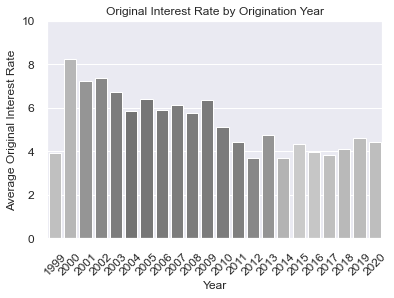

In [15]:
sns.set(style="darkgrid")
g=sns.barplot(x = df['Orig_Year'].unique(), y = df.groupby('Orig_Year').Original_Interest_Rate.mean(), data=df, palette=None, saturation=0)
plt.title('Original Interest Rate by Origination Year')
plt.xlabel('Year')
plt.ylabel('Average Original Interest Rate')
g.set_ylim(0, 10)
plt.rcParams["axes.labelsize"] = 8
plt.xticks(rotation=45,size=12)
plt.yticks(size=12)
plt.show()

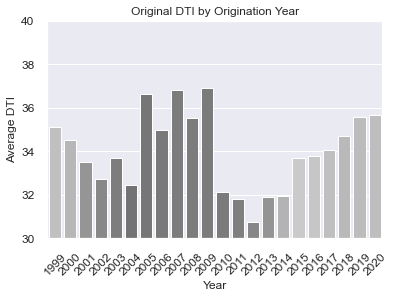

In [16]:
sns.set(style="darkgrid")
g=sns.barplot(x = df['Orig_Year'].unique(), y = df.groupby('Orig_Year').Original_DTI.mean(), data=df, palette=None, saturation=0)
plt.title('Original DTI by Origination Year')
plt.xlabel('Year')
plt.ylabel('Average DTI')
g.set_ylim(30, 40)
plt.rcParams["axes.labelsize"] = 8
plt.xticks(rotation=45,size=12)
plt.yticks(size=12)
plt.show()

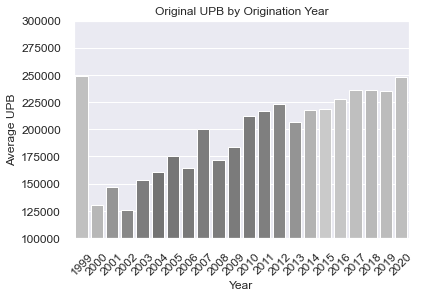

In [17]:
sns.set(style="darkgrid")
g=sns.barplot(x = df['Orig_Year'].unique(), y = df.groupby('Orig_Year').Original_UPB.mean(), data=df, palette=None, saturation=0)
plt.title('Original UPB by Origination Year')
plt.xlabel('Year')
plt.ylabel('Average UPB')
g.set_ylim(100000, 300000)
plt.rcParams["axes.labelsize"] = 8
plt.xticks(rotation=45,size=12)
plt.yticks(size=12)
plt.show()

In [18]:
df.columns.values

array(['Current_Actual_UPB', 'Current_Loan_Delinquency_Status',
       'Loan_Age', 'Remaining_Months_to_Legal_Maturity',
       'Modification_Flag', 'Zero_Balance_Code', 'Current_Interest_Rate',
       'Current_Deferred_UPB', 'Actual_Loss_Calculation',
       'Zero_Balance_Removal_UPB', 'CS_HPA_20_cities', 'CS_HP',
       'UNEMPLOY', 'LF_Part', 'Y10_CMT', 'Y30_fixed_mortgage_rate',
       'Credit_Score', 'First_Payment_Date', 'First_Time_Homebuyer_Flag',
       'Maturity_Date', 'MSA', 'MI%', 'Number_of_Units',
       'Occupancy_Status', 'Original_CLTV', 'Original_DTI',
       'Original_UPB', 'Original_LTV', 'Original_Interest_Rate',
       'Channel', 'Prepayment_Penalty_Flag', 'Property_State',
       'Property_Type', 'Loan_Purpose', 'Original_Loan_Term',
       'Number_of_Borrowers', 'Seller_Name', 'Servicer_Name',
       'Super_Conforming_Flag', 'Orig_Year',
       'numeric_Loan_Delinquency_Status',
       'consol_Loan_Delinquency_Status', 'Target_Performance_Variable',
       'Ever_

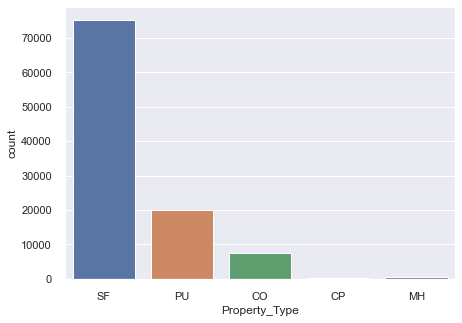

In [19]:
sns.set(rc={'figure.figsize':(7,5)})
sns.countplot(x='Property_Type', data=df)
plt.show()

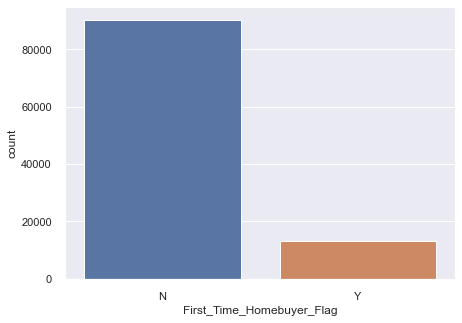

In [20]:
sns.set(rc={'figure.figsize':(7,5)})
sns.countplot(x='First_Time_Homebuyer_Flag', data=df)
plt.show()

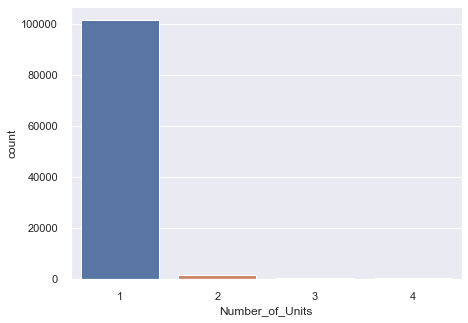

In [21]:
sns.set(rc={'figure.figsize':(7,5)})
sns.countplot(x='Number_of_Units', data=df)
plt.show()

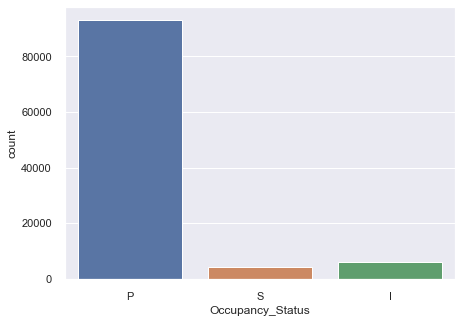

In [22]:
sns.set(rc={'figure.figsize':(7,5)})
sns.countplot(x='Occupancy_Status', data=df)
plt.show()

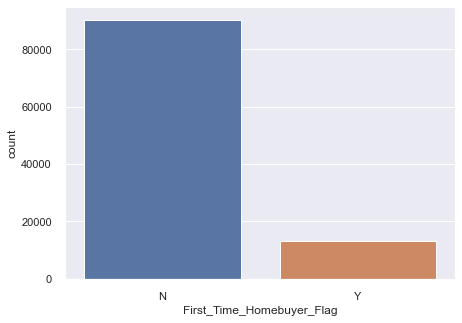

In [23]:
sns.set(rc={'figure.figsize':(7,5)})
sns.countplot(x='First_Time_Homebuyer_Flag', data=df)
plt.show()

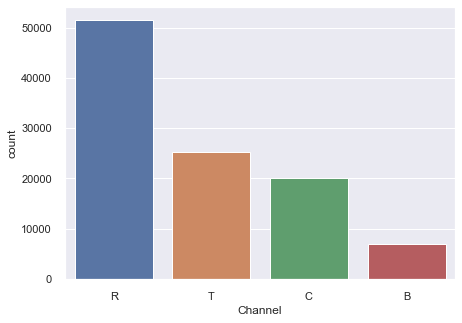

In [24]:
sns.set(rc={'figure.figsize':(7,5)})
sns.countplot(x='Channel', data=df)
plt.show()

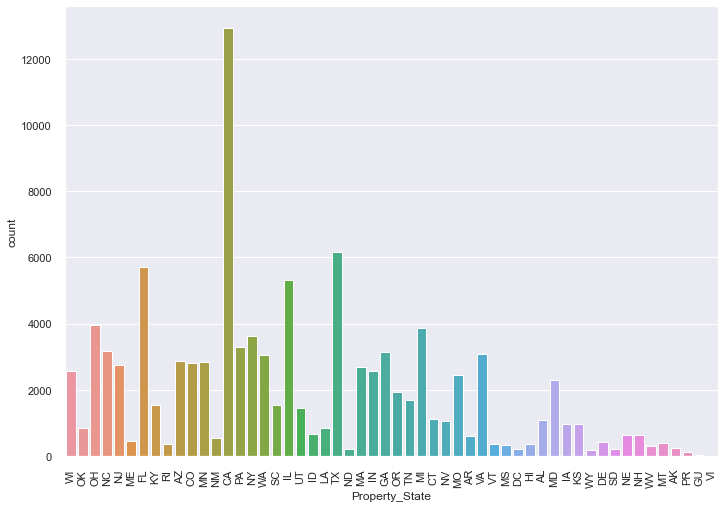

In [25]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.xticks(rotation=90)
sns.countplot(x='Property_State', data=df)
plt.show()

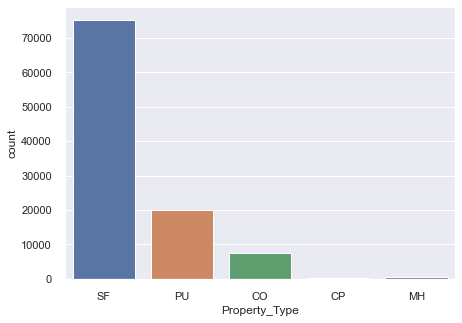

In [26]:
sns.set(rc={'figure.figsize':(7,5)})
sns.countplot(x='Property_Type', data=df)
plt.show()

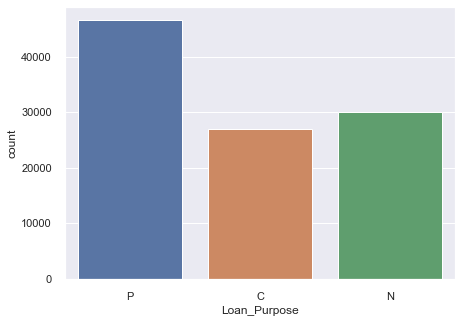

In [27]:
sns.set(rc={'figure.figsize':(7,5)})
sns.countplot(x='Loan_Purpose', data=df)
plt.show()

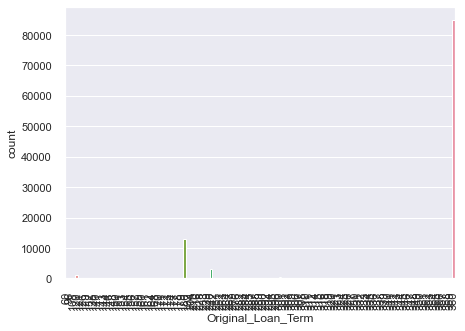

In [28]:
sns.set(rc={'figure.figsize':(7,5)})
plt.xticks(rotation=90)
sns.countplot(x='Original_Loan_Term', data=df)
plt.show()

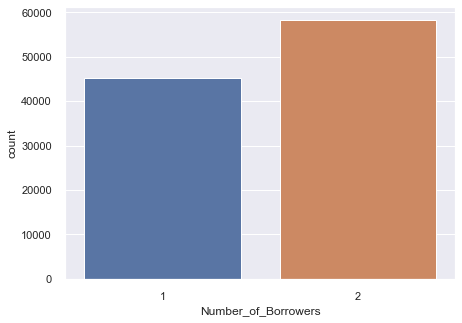

In [29]:
sns.set(rc={'figure.figsize':(7,5)})
sns.countplot(x='Number_of_Borrowers', data=df)
plt.show()

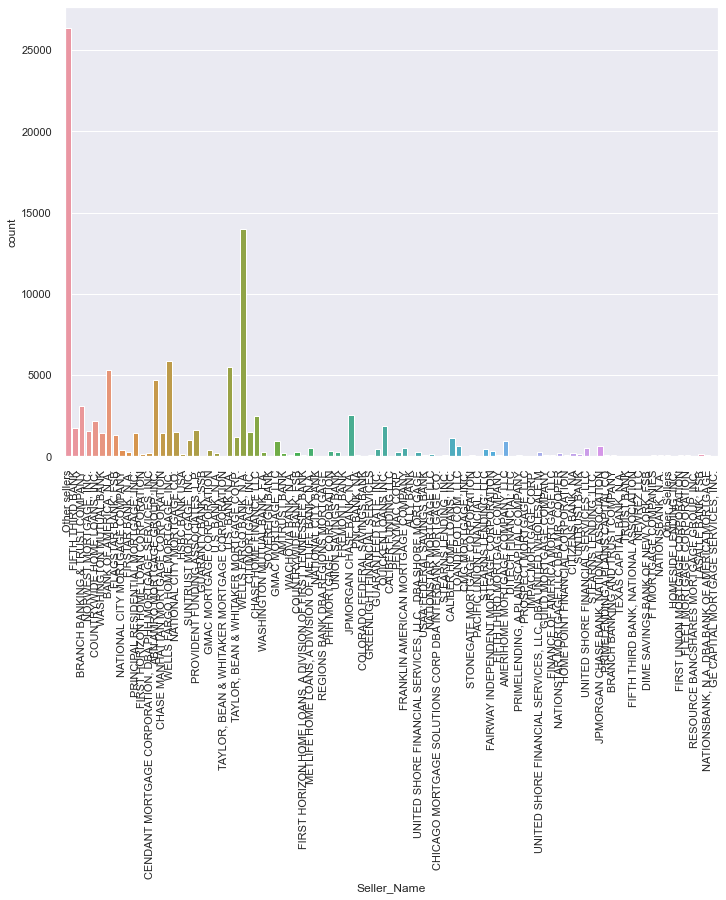

In [30]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x='Seller_Name', data=df)
plt.xticks(rotation=90)
plt.show()

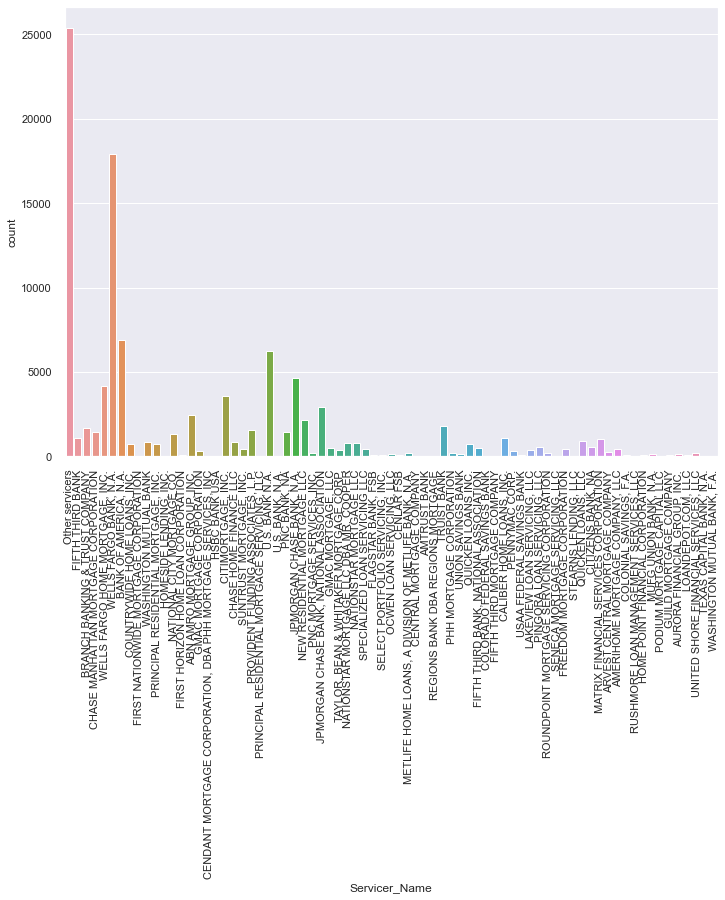

In [31]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.xticks(rotation=90)
sns.countplot(x='Servicer_Name', data=df)
plt.show()

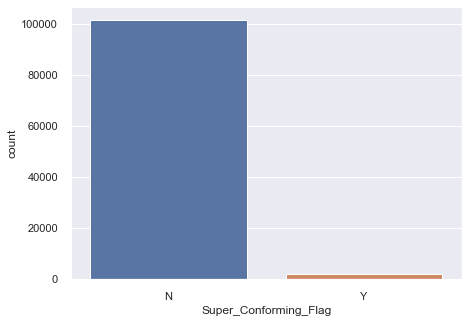

In [32]:
sns.set(rc={'figure.figsize':(7,5)})
sns.countplot(x='Super_Conforming_Flag', data=df)
plt.show()

In [33]:
##Establish default cohorts

In [34]:
default_status =['Default']

In [35]:
df_defaulted_all = df.loc[df['Ever_Default'].isin(default_status)]

In [36]:
df_performing_all = df.loc[~df['Ever_Default'].isin(default_status)]

In [37]:
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

In [38]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

In [39]:
#Credit score

In [40]:
df_defaulted=(df_defaulted_all['Credit_Score'].to_numpy())

In [41]:
df_performing=(df_performing_all['Credit_Score'].to_numpy())

In [42]:
print(np.mean(df_defaulted))
print(np.mean(df_performing))

689.7246317512275
740.346251952623


In [43]:
# Compute the difference of the sample means: mean_diff
mean_diff = np.mean(df_defaulted) - np.mean(df_performing)

# Get bootstrap replicates of means
bs_replicates_defaulted_mean = draw_bs_reps(df_defaulted, np.mean, 10000)
bs_replicates_performing_mean = draw_bs_reps(df_performing, np.mean, 10000)

# Compute samples of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_defaulted_mean -bs_replicates_performing_mean

# Compute 95% confidence interval: conf_int
conf_int = np.percentile(bs_diff_replicates, [2.5, 97.5])

# Print the results
print('difference of means =', mean_diff, 'points')
print('95% confidence interval =', conf_int, 'points')

difference of means = -50.621620201395444 points
95% confidence interval = [-52.76021876 -48.46427213] points


In [44]:
# Compute mean of combined data set: combined_mean
combined_mean = np.mean(np.concatenate((df_defaulted, df_performing)))

# Shift the samples
df_defaulted_shifted = df_defaulted -np.mean(df_defaulted)+combined_mean
df_performing_shifted = df_performing -np.mean(df_performing)+combined_mean

# Get bootstrap replicates of shifted data sets
bs_replicates_df_defaulted = draw_bs_reps(df_defaulted_shifted, np.mean, 10000)
bs_replicates_df_performing = draw_bs_reps(df_performing_shifted, np.mean, 10000)

# Compute replicates of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_df_performing-bs_replicates_df_defaulted

# Compute the p-value
p = np.sum(bs_diff_replicates >= mean_diff) / len(bs_diff_replicates)

# Print p-value

print('p =', format(p, ".4f"))# Compute mean of combined data set: combined_mean

p = 1.0000


In [45]:
#DTI

In [46]:
df_defaulted=df_defaulted_all['Original_DTI'].to_numpy()

In [47]:
df_performing=(df_performing_all['Original_DTI'].to_numpy())

In [48]:
print(np.mean(df_defaulted))
print(np.mean(df_performing))

39.1575286415712
33.86037015798944


In [49]:
# Compute the difference of the sample means: mean_diff
mean_diff = np.mean(df_defaulted) - np.mean(df_performing)

# Get bootstrap replicates of means
bs_replicates_defaulted_mean = draw_bs_reps(df_defaulted, np.mean, 10000)
bs_replicates_performing_mean = draw_bs_reps(df_performing, np.mean, 10000)

# Compute samples of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_defaulted_mean -bs_replicates_performing_mean

# Compute 95% confidence interval: conf_int
conf_int = np.percentile(bs_diff_replicates, [2.5, 97.5])

# Print the results
print('difference of means =', mean_diff, 'points')
print('95% confidence interval =', conf_int, 'points')

difference of means = 5.297158483581754 points
95% confidence interval = [4.85686985 5.75111188] points


In [50]:
# Compute mean of combined data set: combined_mean
combined_mean = np.mean(np.concatenate((df_defaulted, df_performing)))

# Shift the samples
df_defaulted_shifted = df_defaulted -np.mean(df_defaulted)+combined_mean
df_performing_shifted = df_performing -np.mean(df_performing)+combined_mean

# Get bootstrap replicates of shifted data sets
bs_replicates_df_defaulted = draw_bs_reps(df_defaulted_shifted, np.mean, 10000)
bs_replicates_df_performing = draw_bs_reps(df_performing_shifted, np.mean, 10000)

# Compute replicates of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_df_performing-bs_replicates_df_defaulted

# Compute the p-value
p = np.sum(bs_diff_replicates >= mean_diff) / len(bs_diff_replicates)

# Print p-value
print('p =', format(p, ".4f"))# Compute mean of combined data set: combined_mean

p = 0.0000


In [51]:
#Original LTV

In [52]:
df_defaulted=df_defaulted_all['Original_LTV'].to_numpy()

In [53]:
df_performing=(df_performing_all['Original_LTV'].to_numpy())

In [54]:
print(np.mean(df_defaulted))
print(np.mean(df_performing))

79.91816693944354
72.06306724932276


In [55]:
# Compute the difference of the sample means: mean_diff
mean_diff = np.mean(df_defaulted) - np.mean(df_performing)

# Get bootstrap replicates of means
bs_replicates_defaulted_mean = draw_bs_reps(df_defaulted, np.mean, 10000)
bs_replicates_performing_mean = draw_bs_reps(df_performing, np.mean, 10000)

# Compute samples of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_defaulted_mean -bs_replicates_performing_mean

# Compute 95% confidence interval: conf_int
conf_int = np.percentile(bs_diff_replicates, [2.5, 97.5])

# Print the results
print('difference of means =', mean_diff, 'points')
print('95% confidence interval =', conf_int, 'points')

difference of means = 7.855099690120781 points
95% confidence interval = [7.36503932 8.31872524] points


In [56]:
# Compute mean of combined data set: combined_mean
combined_mean = np.mean(np.concatenate((df_defaulted, df_performing)))

# Shift the samples
df_defaulted_shifted = df_defaulted -np.mean(df_defaulted)+combined_mean
df_performing_shifted = df_performing -np.mean(df_performing)+combined_mean

# Get bootstrap replicates of shifted data sets
bs_replicates_df_defaulted = draw_bs_reps(df_defaulted_shifted, np.mean, 10000)
bs_replicates_df_performing = draw_bs_reps(df_performing_shifted, np.mean, 10000)

# Compute replicates of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_df_performing-bs_replicates_df_defaulted

# Compute the p-value
p = np.sum(bs_diff_replicates >= mean_diff) / len(bs_diff_replicates)

# Print p-value
print('p =', format(p, ".4f"))# Compute mean of combined data set: combined_mean

p = 0.0000


In [57]:
#Original_UPB

In [58]:
df_defaulted=df_defaulted_all['Original_UPB'].to_numpy()

In [59]:
df_performing=(df_performing_all['Original_UPB'].to_numpy())

In [60]:
print(np.mean(df_defaulted))
print(np.mean(df_performing))

171635.43371522095
196886.33262808216


In [61]:
# Compute the difference of the sample means: mean_diff
mean_diff = np.mean(df_defaulted) - np.mean(df_performing)

# Get bootstrap replicates of means
bs_replicates_defaulted_mean = draw_bs_reps(df_defaulted, np.mean, 10000)
bs_replicates_performing_mean = draw_bs_reps(df_performing, np.mean, 10000)

# Compute samples of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_defaulted_mean -bs_replicates_performing_mean

# Compute 95% confidence interval: conf_int
conf_int = np.percentile(bs_diff_replicates, [2.5, 97.5])

# Print the results
print('difference of means =', mean_diff, 'points')
print('95% confidence interval =', conf_int, 'points')

difference of means = -25250.898912861216 points
95% confidence interval = [-28968.16115953 -21411.29438994] points


In [62]:
# Compute mean of combined data set: combined_mean
combined_mean = np.mean(np.concatenate((df_defaulted, df_performing)))

# Shift the samples
df_defaulted_shifted = df_defaulted -np.mean(df_defaulted)+combined_mean
df_performing_shifted = df_performing -np.mean(df_performing)+combined_mean

# Get bootstrap replicates of shifted data sets
bs_replicates_df_defaulted = draw_bs_reps(df_defaulted_shifted, np.mean, 10000)
bs_replicates_df_performing = draw_bs_reps(df_performing_shifted, np.mean, 10000)

# Compute replicates of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_df_performing-bs_replicates_df_defaulted

# Compute the p-value
p = np.sum(bs_diff_replicates >= mean_diff) / len(bs_diff_replicates)

# Print p-value
print('p =', format(p, ".4f"))# Compute mean of combined data set: combined_mean

p = 1.0000


In [63]:
#Original_Interest_Rate

In [64]:
df_defaulted=df_defaulted_all['Original_Interest_Rate'].to_numpy()

In [65]:
df_performing=(df_performing_all['Original_Interest_Rate'].to_numpy())

In [66]:
print(np.mean(df_defaulted))
print(np.mean(df_performing))

6.394786824877251
5.300544885610899


In [67]:
# Compute the difference of the sample means: mean_diff
mean_diff = np.mean(df_defaulted) - np.mean(df_performing)

# Get bootstrap replicates of means
bs_replicates_defaulted_mean = draw_bs_reps(df_defaulted, np.mean, 10000)
bs_replicates_performing_mean = draw_bs_reps(df_performing, np.mean, 10000)

# Compute samples of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_defaulted_mean -bs_replicates_performing_mean

# Compute 95% confidence interval: conf_int
conf_int = np.percentile(bs_diff_replicates, [2.5, 97.5])

# Print the results
print('difference of means =', mean_diff, 'points')
print('95% confidence interval =', conf_int, 'points')

difference of means = 1.094241939266352 points
95% confidence interval = [1.0623935 1.1273263] points


In [68]:
# Compute mean of combined data set: combined_mean
combined_mean = np.mean(np.concatenate((df_defaulted, df_performing)))

# Shift the samples
df_defaulted_shifted = df_defaulted -np.mean(df_defaulted)+combined_mean
df_performing_shifted = df_performing -np.mean(df_performing)+combined_mean

# Get bootstrap replicates of shifted data sets
bs_replicates_df_defaulted = draw_bs_reps(df_defaulted_shifted, np.mean, 10000)
bs_replicates_df_performing = draw_bs_reps(df_performing_shifted, np.mean, 10000)

# Compute replicates of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_df_performing-bs_replicates_df_defaulted

# Compute the p-value
p = np.sum(bs_diff_replicates >= mean_diff) / len(bs_diff_replicates)

# Print p-value
print('p =', format(p, ".4f"))# Compute mean of combined data set: combined_mean

p = 0.0000


In [69]:
print(combined_mean)
print(np.mean(df_defaulted_shifted))
print(np.mean(df_performing_shifted))
print(np.mean(bs_replicates_df_defaulted))
print(np.mean(bs_replicates_df_performing))
print(np.sum(bs_diff_replicates >= mean_diff))
print(len(bs_diff_replicates))

5.326361347620427
5.326361347620427
5.326361347620429
5.326245694879019
5.326355628830758
0
10000


In [70]:
#'First_Time_Homebuyer_Flag','Modification_Flag'

In [71]:
df_defaulted_all = df.loc[(df['Ever_Default'].isin(default_status)) & ~(df['Modification_Flag']=='Y')]

In [72]:
df_defaulted_mod = df.loc[(df['Ever_Default'].isin(default_status)) & (df['Modification_Flag']=='Y')]

In [73]:
print(len(df_defaulted_mod.index)/len(df_defaulted_all.index))

0.3289831430125068


In [74]:
df_performing_all = df.loc[~(df['Ever_Default'].isin(default_status)) & ~(df['Modification_Flag']=='Y')]

In [75]:
df_performing_mod = df.loc[~(df['Ever_Default'].isin(default_status)) & (df['Modification_Flag']=='Y')]

In [76]:
print(len(df_performing_mod.index)/len(df_performing_all.index))

0.007761515239072604


In [77]:
print(len(df_defaulted_all.index)/len(df_performing_all.index))

0.018322755487361383


In [78]:
df_modded =df.loc[(df['Modification_Flag']=='Y')]

In [79]:
df_not_modded =df.loc[~(df['Modification_Flag']=='Y')]

In [80]:
df_modded['Ever_Default'] = np.where(df_modded['Ever_Default'].isin(default_status),1,0)

In [81]:
df_not_modded['Ever_Default'] = np.where(df_not_modded['Ever_Default'].isin(default_status),1,0)

In [82]:
df_modded=df_modded['Ever_Default'].to_numpy()

In [83]:
df_not_modded=df_not_modded['Ever_Default'].to_numpy()

In [84]:
# Compute the difference of the sample means: mean_diff
mean_diff = np.mean(df_modded) - np.mean(df_not_modded)

# Get bootstrap replicates of means
bs_replicates_defaulted_mean = draw_bs_reps(df_modded, np.mean, 10000)
bs_replicates_performing_mean = draw_bs_reps(df_not_modded, np.mean, 10000)

# Compute samples of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_defaulted_mean -bs_replicates_performing_mean

# Compute 95% confidence interval: conf_int
conf_int = np.percentile(bs_diff_replicates, [2.5, 97.5])

# Print the results
print('difference of means =', mean_diff, 'points')
print('95% confidence interval =', conf_int, 'points')

difference of means = 0.4191456555099703 points
95% confidence interval = [0.39278455 0.44551968] points


In [85]:
# Compute mean of combined data set: combined_mean
combined_mean = np.mean(np.concatenate((df_modded, df_not_modded)))

# Shift the samples
df_defaulted_shifted = df_defaulted -np.mean(df_modded)+combined_mean
df_performing_shifted = df_performing -np.mean(df_not_modded)+combined_mean

# Get bootstrap replicates of shifted data sets
bs_replicates_df_defaulted = draw_bs_reps(df_defaulted_shifted, np.mean, 10000)
bs_replicates_df_performing = draw_bs_reps(df_performing_shifted, np.mean, 10000)

# Compute replicates of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_df_performing-bs_replicates_df_defaulted

# Compute the p-value
p = np.sum(bs_diff_replicates >= mean_diff) / len(bs_diff_replicates)

# Print p-value
print('p =', format(p, ".4f"))# Compute mean of combined data set: combined_mean

p = 0.0000
